# Challenge - CO2 Emissions 🌎

import pandas and pyplot

In [77]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

### Download the Data 

Just run the cell 🔥

In [78]:
! mkdir ../data
! curl https://storage.googleapis.com/schoolofdata-datasets/Data-Analysis.Data-Visualization/CO2_per_capita.csv > ../data/CO2_per_capita.csv
! tree ..

mkdir: cannot create directory ‘../data’: File exists


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  411k  100  411k    0     0  1674k      0 --:--:-- --:--:-- --:--:-- 1681k
..
├── data
│   └── CO2_per_capita.csv
├── README.md
└── src
    ├── app.py
    └── Plotly-CO2-emissions.ipynb

3 directories, 4 files


**Q1**. Load the dataset `CO2_per_capita.csv` into a **Pandas Dataframe**. What does this dataset contain?

In [97]:
# TODO: Load dataset
co2_path = "../data/CO2_per_capita.csv"
co2_df = pd.read_csv(co2_path, sep=";")

In [80]:
# TODO: .info()
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12896 entries, 0 to 12895
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country Name                  12896 non-null  object 
 1   Country Code                  12896 non-null  object 
 2   Year                          12896 non-null  int64  
 3   CO2 Per Capita (metric tons)  10599 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 403.1+ KB


In [81]:
#.describe
co2_df.describe()

,Year,CO2 Per Capita (metric tons)
count,12896.000000,10599.000000
mean,1985.500000,4.314893
std,15.008913,7.186523
min,1960.000000,0.000580
25%,1972.750000,0.413003
50%,1985.500000,1.590776
75%,1998.250000,6.007173
max,2011.000000,99.840439


***Create a function whose parameters are a start year, an end year, and a number of countries to be displayed.***

This function should filter the dataframe by start and end year. 

It should then average Co2 emissions by country. 

It should then keep only the number of countries chosen (top_x).

it will return a bar plot with plotly

In [82]:
co2_df.dropna(inplace=True, axis=0)
df = co2_df.copy()
df_grouped = df[["Country Name", "CO2 Per Capita (metric tons)"]].groupby(['Country Name'],as_index= False)
df_grouped.head()
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10599 entries, 26 to 12895
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country Name                  10599 non-null  object 
 1   Country Code                  10599 non-null  object 
 2   Year                          10599 non-null  int64  
 3   CO2 Per Capita (metric tons)  10599 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 414.0+ KB


In [83]:
co2_df[(co2_df["Year"]>=2008) & (co2_df["Year"] <= 2011)]
co2_df.groupby("Country Name")["CO2 Per Capita (metric tons)"].mean().sort_values(ascending=False)[:10]

Country Name
Qatar                   54.423341
United Arab Emirates    31.844877
Kuwait                  28.399394
Luxembourg              28.196509
Aruba                   21.766264
Brunei Darussalam       21.497854
Bahrain                 19.867874
United States           19.303472
North America           18.957341
Trinidad and Tobago     15.802071
Name: CO2 Per Capita (metric tons), dtype: float64

In [84]:
def top_n_emitters(df, start_year=2008, end_year=2011, nb_displayed=10):    
    #years filter
    df_filtre = df[(df["Year"]>=start_year) & (df["Year"] <= end_year)]
    #do the mean for each country
    #sort the values and keep nb_displayed
    top_10_countries = df_filtre.groupby("Country Name")["CO2 Per Capita (metric tons)"].mean().sort_values(ascending = False)[:nb_displayed]
    #create the fig
    #return the fig
    return sns.barplot(x=top_10_countries.index, y = top_10_countries)


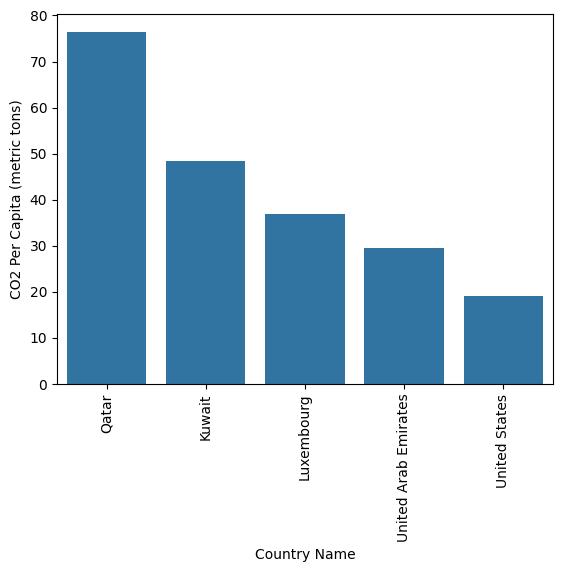

In [85]:
#try the function here
fig = top_n_emitters(co2_df, 1965, 1970, 5)
plt.xticks(rotation=90)
fig;

Now we're going to display the data with a scatter plot on an interactive map. 
- Use the __px.scatter_geo__ function for this. 
- This works with country code. We have this information in the “Country Code” column.
- The size of the points will depend on the amount of CO2 per country.
- We want the map to evolve over the years. (use the animation_frame parameter.)

Optional: Test the __projection__ and the __hover_name__  parameters.

In [86]:
# TODO: Visualize your data on a World map
fig = px.scatter_geo(data_frame=co2_df, locations="Country Code", size ="CO2 Per Capita (metric tons)",
                     projection='natural earth', hover_name="CO2 Per Capita (metric tons)")
fig.show()


## Streamlit 

Now create an app.py file. 

Add :
    
    - libraries
    
    - title

    - the dataframe

    - a function to create a bar chart of the top n countries with the highest Co2 per capita emissions

    -a slider to select the year. key to parameters (min_values, max_values, value)

    - a selectbox to choose how many countries to display in the top n. Select values should be [3,5,10,20,30].

    - use the function you added above (make sure your slider and select box values are stored in variables)

    - add the map you made with scatter geo



# Part 2 

We're going to add a little color to our graphics. From now on, we'd like the color of a country to depend on the continent on which it's located. To do this, we need to add a continent column to our dataframe. Let's upload this information into a new dataframe

Let's now to try to get some more data to complete our dataset

In [87]:
! curl https://gist.githubusercontent.com/stevewithington/20a69c0b6d2ff846ea5d35e5fc47f26c/raw/13716ceb2f22b5643ce5e7039643c86a0e0c6da6/country-and-continent-codes-list-csv.csv > ../data/geo_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12081  100 12081    0     0  31024      0 --:--:-- --:--:-- --:--:-- 30976


A new file has been downloaded to the data folder. Open it.

In [94]:
#open the file in `data/geo_data.csv`

geo_data = pd.read_csv("../data/geo_data.csv")
geo_data.head()


,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


We're going to make a join with the previous table. Let's select only the two columns of interest which two columns are the most important?

<details>
<summary>
Solution
</summary>
The two most important columns are the <strong>Three_Letter_Country_Code</strong> and the <strong>Continent_Name</strong>

</details>

In [ ]:
geo_data.info()

In [104]:
#Selects the two most important columns in a new DataFrame (in this case we want to retrieve the continent information)
geo_data_filter = geo_data[["Three_Letter_Country_Code", "Continent_Name"]]

In [105]:
geo_data_filter.dropna(axis=0,inplace=True)

/tmp/ipykernel_4241/3815817567.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
geo_data_filter.rename(columns={"Three_Letter_Country_Code" : "Country Code"},inplace=True)
geo_data_filter

/tmp/ipykernel_4241/456541782.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country Code,Continent_Name
0,AFG,Asia
1,ALB,Europe
2,ATA,Antarctica
3,DZA,Africa
4,ASM,Oceania
...,...,...
253,VEN,South America
254,WLF,Oceania
255,WSM,Oceania
256,YEM,Asia


Now we can join our data with the geo data using the <strong>Three_Letter_Country_Code</strong> column.

In [110]:
#Make the join
co2_merge = pd.merge(left=co2_df,right=geo_data_filter,on="Country Code")
co2_merge.head()

,Country Name,Country Code,Year,CO2 Per Capita (metric tons),Continent_Name
0,Aruba,ABW,1960,NaN,North America
1,Aruba,ABW,1961,NaN,North America
2,Aruba,ABW,1962,NaN,North America
3,Aruba,ABW,1963,NaN,North America
4,Aruba,ABW,1964,NaN,North America


redo the same maps as before but now with each bubble the color of its continent

In [91]:
#Same map as before but with continent colors
#fig = px.scatter_geo()
#fig.show()


Improves the function that used to make a bar plot based on a departure year, an arrival year and a top number of countries to be displayed. But this time the color of the bars depends on the continent.

In [92]:
#The function


def top_n_emitters_v2(df, start_year=2008, end_year=2011, nb_displayed=10):



SyntaxError: incomplete input (558189985.py, line 5)

In [ ]:
#use `top_n_emitters_v2`

fig = top_n_emitters_v2(co2_df_to_plot, 1970, 1982, 15)
fig.show() 


Make a new map. Use the __choropleth__ map. Chose the map you prefer for you streamlit app

Also make a frame animation according to the years

In [ ]:
#fig = px.choropleth()
#fig.show()


## Streamlit


Add graphs from part 2 to the same streamlit app as part 1